# Exploring `SpatialData` objects using `napari`

Napari is a Python library for n-dimensional image visualisation, annotation, and analysis. With napari you can explore, modify and annotate 2D, 3D, and higher-dimensional data. Within the `SpatialData` ecosystem we provide the `napari-spatialdata` plugin that allows you do load `SpatialData` objects into `napari`.

⚠️ Adjust the variable below to the data path on your specific workstation.

In [1]:
%load_ext jupyter_black

data_path = "../data/"

In [31]:
import spatialdata as sd
import spatialdata_plot as sdp
import napari_spatialdata as nsd
import matplotlib.pyplot as plt
import pandas as pd

for p in [sd, sdp, nsd]:
    print(f"{p.__name__}: {p.__version__}")

sdata_visium = sd.read_zarr(data_path + "visium.zarr")
sdata_visium

spatialdata: 0.2.2
spatialdata_plot: 0.2.6
napari_spatialdata: 0.5.2.post1


SpatialData object, with associated Zarr store: /Users/ttreis/Documents/GitHub/spatialdata-workshops/data/visium.zarr
├── Images
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 2000, 1744)
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image': DataArray[cyx] (3, 600, 523)
├── Shapes
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (5756, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (5756, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Gliob

## Interactively explore and annotate the data
⚠️ Due to a bug, you currently have to create the empty `Shapes` layer for annotation before loading the existing `Shapes` layer.

In [32]:
nsd.Interactive(sdata_visium)

/Users/ttreis/miniforge3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
2024-09-07 16:58:41.269 | INFO     | napari_spatialdata._view:_on_layer_update:339 - Updating layer.
2024-09-07 16:58:41.270 | INFO     | napari_spatialdata._view:_on_layer_update:339 - Updating layer.
2024-09-07 16:58:44.637 | INFO     | napari_spatialdata._view:_on_layer_update:339 - Updating layer.
2024-09-07 16:58:44.737 | INFO     | napari_spatialdata._view:_on_layer_update:339 - Updating layer.
Traceback (most recent call last):
  File "/Users/ttreis/miniforge3/envs/spatialdata-workshop/lib/python3.11/site-packages/napari/_qt/qt_main_window.py", line 572, in closeEvent
    quit_app()
  File "/Users/ttreis/miniforge3/envs/spatialdata-workshop/lib/python3.11/site-packages/napari/_qt/qt_event_loop.py", line 232, in quit_app
    v.close()
  File

## Inspect the shape we just created

In [33]:
sdata_visium

SpatialData object, with associated Zarr store: /Users/ttreis/Documents/GitHub/spatialdata-workshops/data/visium.zarr
├── Images
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 2000, 1744)
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image': DataArray[cyx] (3, 600, 523)
├── Shapes
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (5756, 2) (2D shapes)
│     └── 'ifi6_hotspots': GeoDataFrame shape: (3, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (5756, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes), ifi6_hotspots (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Sh

INFO     Rasterizing image for faster rendering.                                                                   


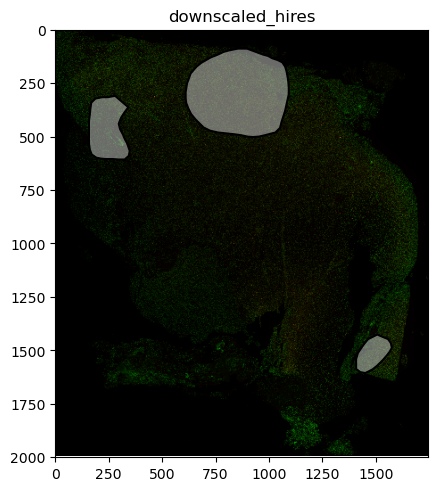

In [34]:
(
    sdata_visium.pl.render_images()
    .pl.render_shapes(
        "ifi6_hotspots",
        outline_alpha=1,
        contour_px=300,
        # method="matplotlib",
        fill_alpha=0.5,
    )
    .pl.show("downscaled_hires")
)

## Use the annotated shape to extract a subpopulation

In [42]:
from spatialdata import polygon_query

polygon = sdata_visium["ifi6_hotspots"].geometry.iloc[0]
filtered_sdata = polygon_query(
    sdata_visium, polygon=polygon, target_coordinate_system="downscaled_hires"
)
filtered_sdata

SpatialData object
├── Images
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 413, 482)
├── Shapes
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (413, 2) (2D shapes)
│     └── 'ifi6_hotspots': GeoDataFrame shape: (1, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (413, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes), ifi6_hotspots (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)

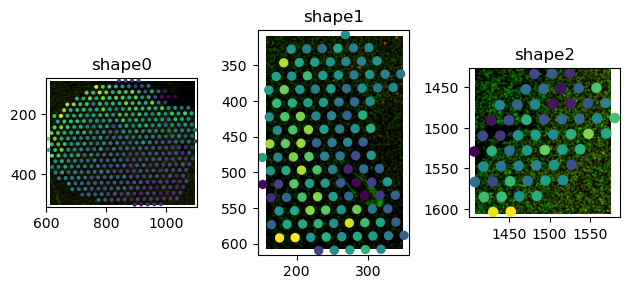

In [56]:
from spatialdata import polygon_query

fig, axs = plt.subplots(1, 3)

idx_in_selection = []

for shape in range(3):

    polygon = sdata_visium["ifi6_hotspots"].geometry.iloc[shape]
    filtered_sdata = polygon_query(
        sdata_visium, polygon=polygon, target_coordinate_system="downscaled_hires"
    )
    filtered_sdata.pl.render_images().pl.render_shapes(
        element="CytAssist_FFPE_Protein_Expression_Human_Glioblastoma",
        color="MT-CO2",
    ).pl.show("downscaled_hires", ax=axs[shape], colorbar=False, title=f"shape{shape}")

    # store names of spots within our 3 selections
    idx_in_selection.extend(filtered_sdata.tables["table"].obs.index.tolist())

plt.tight_layout()

## Use the subpopulation to annotate the original data

In [58]:
idx_in_selection[:3]

['AACATACTAGCCGAAG-1', 'AACCAAGCATCTTGGA-1', 'AACGAGAATGAATTAT-1']

In [64]:
sdata_visium.tables["table"].obs["annotation"] = ""

sdata_visium.tables["table"].obs.loc[idx_in_selection, "annotation"] = "IFI6 Hotspot"

INFO     Rasterizing image for faster rendering.                                                                   


/Users/ttreis/miniforge3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata_plot/pl/basic.py:879: UserWarning: Converting copy of 'annotation' column to categorical dtype for categorical plotting. Consider converting before plotting.
  _render_shapes(
/Users/ttreis/miniforge3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata_plot/pl/utils.py:782: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


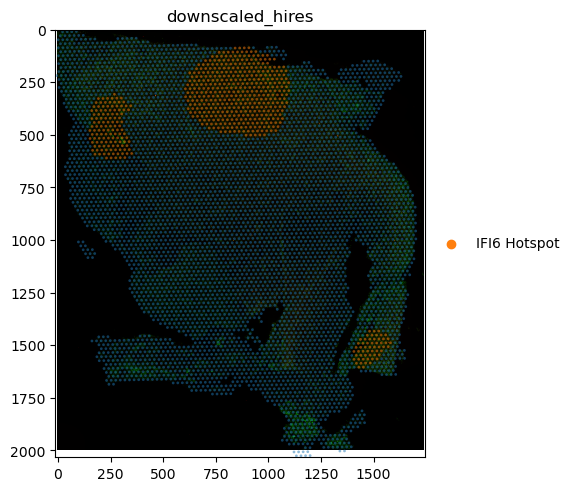

In [65]:
sdata_visium.pl.render_images().pl.render_shapes(
    element="CytAssist_FFPE_Protein_Expression_Human_Glioblastoma",
    color="annotation",
    fill_alpha=0.5,
).pl.show("downscaled_hires")